<a href="https://colab.research.google.com/github/HyeonGeunY/NYU2021/blob/main/01_tensor_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

## Import the library

In [109]:
import torch  # <Ctrl> / <Shift> + <Return>

## Getting help in Jupyter

In [110]:
torch.sq  # <Tab>

AttributeError: ignored

In [111]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [112]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [113]:
# Annotate your functions / classes!
torch.nn.Module?

In [114]:
torch.nn.Module??

## Dropping to Bash: magic!

In [115]:
# List all the files in the current directory
!ls -lh

total 8.0K
drwx------ 6 root root 4.0K Jul  4 12:50 drive
drwxr-xr-x 1 root root 4.0K Jun 29 13:44 sample_data


In [116]:
%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

ls: cannot access '*.*': No such file or directory


In [117]:
# Getting some general help
%magic

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [118]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [119]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [120]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [121]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [122]:
t

tensor([[[1.5156e-34, 0.0000e+00, 7.0065e-44, 7.0065e-44],
         [6.3058e-44, 6.7262e-44, 7.7071e-44, 6.3058e-44],
         [6.7262e-44, 7.2868e-44, 1.1771e-43, 6.8664e-44]],

        [[7.0065e-44, 8.1275e-44, 7.4269e-44, 6.7262e-44],
         [8.1275e-44, 7.2868e-44, 7.1466e-44, 6.4460e-44],
         [7.0065e-44, 7.5670e-44, 7.8473e-44, 7.7071e-44]]])

In [123]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[1., 8., 4., 1.],
         [1., 1., 3., 5.],
         [1., 1., 9., 2.]],

        [[6., 5., 7., 5.],
         [8., 1., 4., 4.],
         [0., 8., 1., 3.]]])

In [124]:
t

tensor([[[1., 8., 4., 1.],
         [1., 1., 3., 5.],
         [1., 1., 9., 2.]],

        [[6., 5., 7., 5.],
         [8., 1., 4., 4.],
         [0., 8., 1., 3.]]])

In [125]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[1., 8., 4., 1., 1., 1., 3., 5.],
        [1., 1., 9., 2., 6., 5., 7., 5.],
        [8., 1., 4., 4., 0., 8., 1., 3.]])

In [126]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [127]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [128]:
# This *is* important, sigh...
s = r.clone()

In [129]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [130]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [131]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [132]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [133]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [134]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [135]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [136]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([1., 2., 4., 5., 1.])

In [137]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 1.0, last: 1.0


In [138]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([2., 4.])

In [139]:
v

tensor([1., 2., 3., 4.])

In [140]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [141]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [142]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [143]:
m.dim()

2

In [144]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [145]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [146]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [147]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [148]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [149]:
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

tensor([[5.],
        [2.]])

In [150]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [151]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [152]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [153]:
# Scalar product
m @ v

tensor([49., 47.])

In [154]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [155]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [156]:
t_test = torch.rand(2, 2, 2)
t_test

tensor([[[0.2817, 0.1136],
         [0.3335, 0.7291]],

        [[0.4639, 0.7285],
         [0.5518, 0.1175]]])

In [157]:
t_test[0, :, :]

tensor([[0.2817, 0.1136],
        [0.3335, 0.7291]])

In [158]:
t_test[[0], :, :]

tensor([[[0.2817, 0.1136],
         [0.3335, 0.7291]]])

In [159]:
t_test[:, [1], :]

tensor([[[0.3335, 0.7291]],

        [[0.5518, 0.1175]]])

In [160]:
t_test[:, 1, :]

tensor([[0.3335, 0.7291],
        [0.5518, 0.1175]])

In [161]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [162]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.6219, 5.6955, 3.9045, 7.6856],
        [4.1760, 2.9776, 1.9078, 9.1109]])

In [163]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.5684, 4.2854, 2.3367, 6.9638],
        [3.0123, 1.6513, 0.3990, 8.0639]])

In [164]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.8493, 3.0937, 0.8932, 6.9738],
        [0.2066, 1.0620, 0.9700, 4.1085]])

In [165]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 2.2290, 10.9859,  7.5057, 39.7218],
        [ 8.2766,  2.5510,  1.1342, 29.7813]])

In [166]:
m.size()

torch.Size([2, 4])

In [167]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [168]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors

In [169]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [170]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [171]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [172]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [173]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [174]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
%cd /content/drive/MyDrive/NYU2021/

/content/drive/MyDrive/NYU2021


In [180]:
# Set default plots
from res.plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

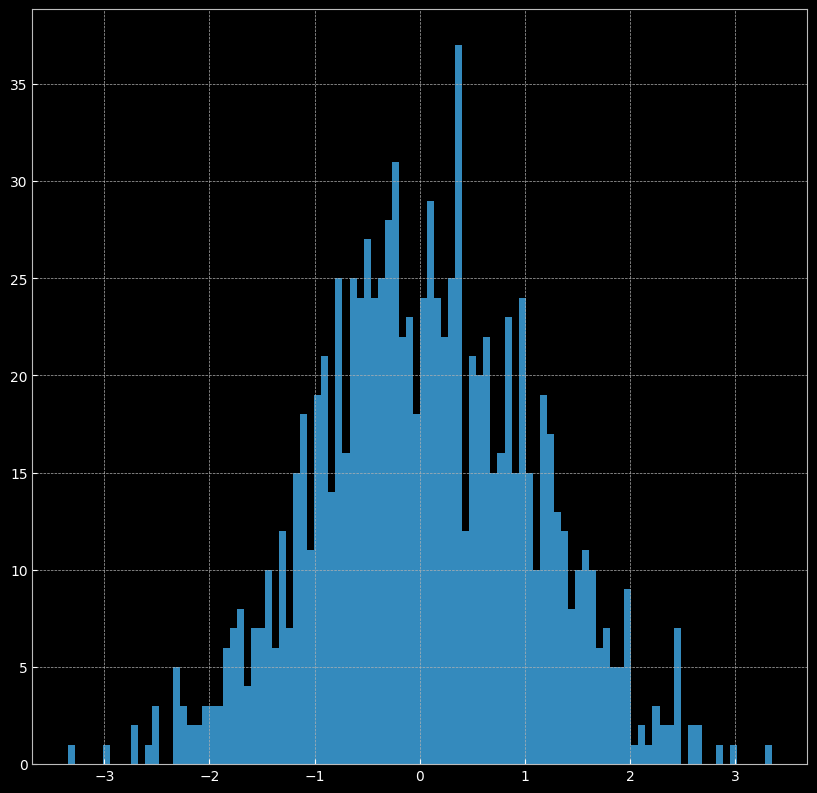

In [181]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

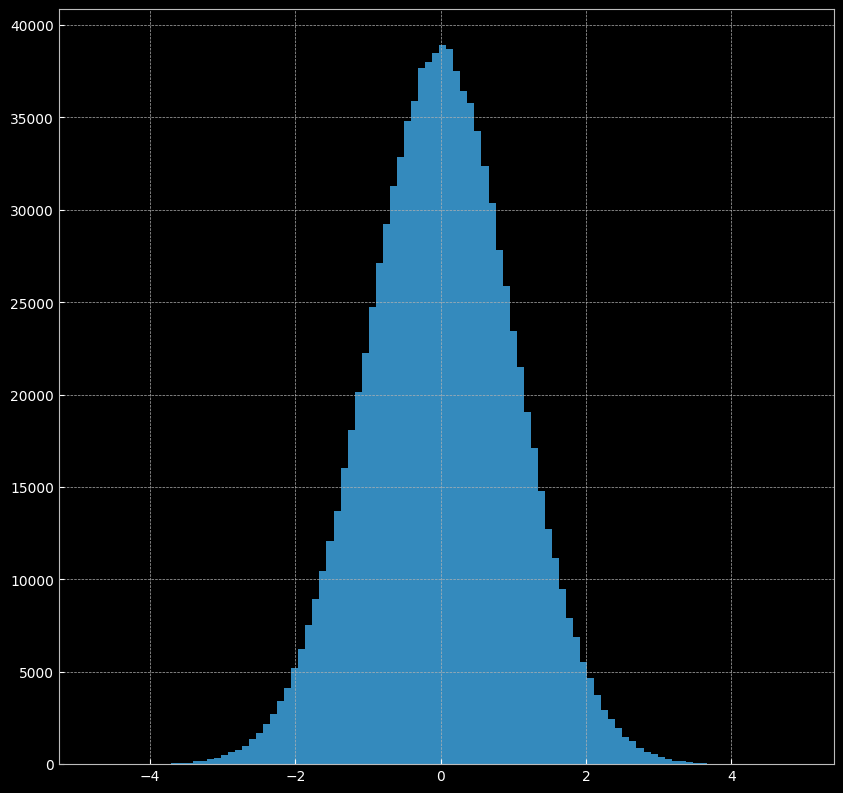

In [182]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

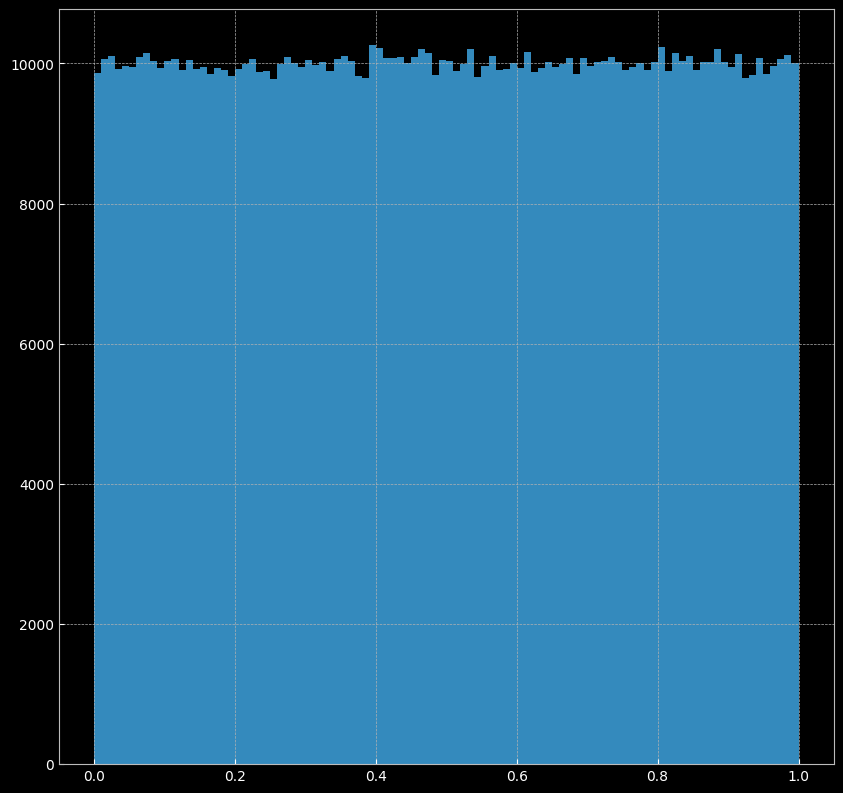

In [183]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [184]:
# Helper to get what kind of tensor types
torch.*Tensor?

In [185]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [186]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [187]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [188]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [189]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [190]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [191]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [192]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [193]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [194]:
# Creates two tensor of size 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [195]:
# Concatenate on axis 0, so you get 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [196]:
# Concatenate on axis 1, so you get 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.